In [1]:
%%javascript
Jupyter.notebook.config.update({
  'load_extensions': { 'vim_binding/vim_binding': true },
});

<IPython.core.display.Javascript object>

# Unravelling Neural Networks for Shallow Learners

### Magnus Kulke, 19. April 2018 (magnus.kulke@moovel.com)

<img src="img/moovel.png" alt="moovel" style="margin: auto; width: 200px;"/>


# Why?

> When you boil it down, AI today is deep learning, and deep learning is backprop. 

[Somers, James: "Is AI Riding a One-Trick Pony?" in MIT Technology Review Sep 29th, 2017.](http://https://www.technologyreview.com/s/608911/is-ai-riding-a-one-trick-pony)

## Examples

* Autonomous Driving
* Alpha Go
* Diagnosis of diseases

# Scope

The presentation aims to build a basic understanding of how Neural Networks operate. The inner workings of a AI are usually obscured by convenient frameworks and abstractions (Tensorflow, MXNet). By retracing the underlying principles and eventually deriving a functional implementation from it, we can get insights on the features and limitation of contemporary AI technology.

## Not covered

* An exhaustive taxonomy of the ML field.
* Alternative concepts (logistic regression, convoluation).
* History, Evolution of NN.

# Caveat

I'm clueless. My math skills are poor. For further reference on the respective topics please consult proper literature, which is manifold.

# Terminology

## Machine Learning

Procedure to improve a machine's assessments _iterativly_. Can be done "supervised" (using labeled training data) or "unsupervised" (pattern recognition, clustering).

## Neural Network

A ML method mostly used in supervised learning scenarios to classify data (regression). Emulates a model of perception and reaction found in biology. Input is processed by a network of Neurons, producing a meaningful output (feed forward). 


## Deep Learning

Machine Learning method using deeply _layered_ Neural Networks. Neurons are arangend in _input_, _output_ layers and at least one _hidden_ layer.

# Machine Learning

Instead of carefully crafted and proven-to-be-correct algorithms which presume a concious understanding of the problem domain, machine learning aims to close in to a solution using iterative improvements and embracing probabilistics and fuzzyness. The correctnes inherent to conventional engineering solutions is often not required for a certain class of issues.

## Examples

* `true | false` _vs_ `[0.001, 0.003, 0,781, 0.018]`
* Semantic language model _vs_ (statistical) natural language processing (NLP)
* NASA Mars Rover _vs_ web advertisement  

# Giraffes & Crocodiles

* Simple example for ML algorithm: iteratively find a linear function which is able to _classify_ data.
* Data point is put into a randomly choosen function. 
* Expected outcome is compared with the actual result, error delta is used to tweak the function.
* Following iterations with other data points further tweak the function.
* Tell giraffes from crocodiles by their prominent features: width and height.

<img src="img/giraffes_and_crocodiles.jpg" alt="giraffes and crocodiles" style="margin: auto; width: 600px;"/>

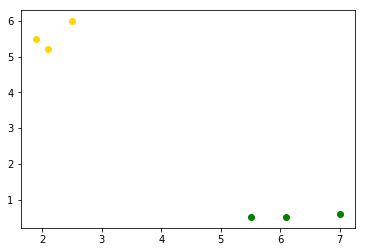

In [35]:
import matplotlib.pyplot as plt

giraffes = numpy.array([
    [1.9, 5.5],
    [2.5, 6.0],
    [2.1, 5.2],
])
g_x, g_y = giraffes.T
plt.scatter(g_x, g_y, c = 'gold')

crocodiles = numpy.array([
    [7.0, 0.6],
    [5.5, 0.5],
    [6.1, 0.5],
])
c_x, c_y = crocodiles.T
plt.scatter(c_x, c_y, c = 'green')

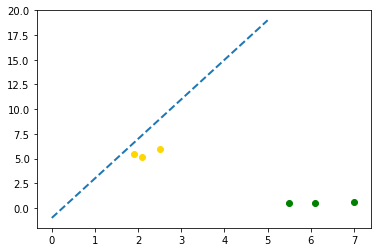

In [37]:
def some_linear_fn(x):
    return 4 * x - 1

x = numpy.linspace(0, 5)
y = some_linear_fn(x)
plt.plot(x, y, '--', linewidth=2)

plt.scatter(g_x, g_y, c = 'gold')
plt.scatter(c_x, c_y, c = 'green')

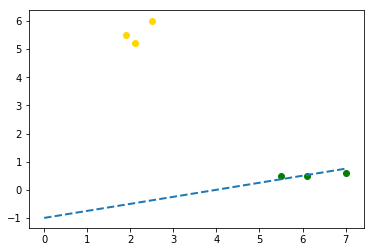

In [41]:
def some_linear_fn(x):
    return 0.25 * x - 1

x = numpy.linspace(0, 7)
y = some_linear_fn(x)
plt.plot(x, y, '--', linewidth=2)

plt.scatter(g_x, g_y, c = 'gold')
plt.scatter(c_x, c_y, c = 'green')

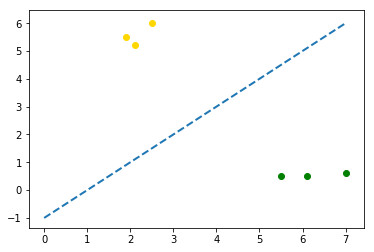

In [46]:
def some_linear_fn(x):
    return 1 * x - 1

x = numpy.linspace(0, 7)
y = some_linear_fn(x)
plt.plot(x, y, '--', linewidth=2)

plt.scatter(g_x, g_y, c = 'gold')
plt.scatter(c_x, c_y, c = 'green')

# Limitations

When features in data have more complex relations than simple linear ones, linear regression does not work any more.

In [73]:
import matplotlib.pyplot as plt

non_linear_a = numpy.array([
    [5.9, 2],
    [4.2, 3],
    [2.5, 6.0],
    [3.5, 3.2],
    [2.1, 5.2],
    [7.0, 0.6],
])

non_linear_b = numpy.array([
    [5.5, 0.5],
    [3.5, 1],
    [2.5, 3.3],
    [3,   2],
    [2,   1],
    [6.1, 0.5],
    [5,   5],
    [6.5, 4.5],
    [6.1, 4.4],
    [4.0, 4.8],
    [6.6, 2.8],
])

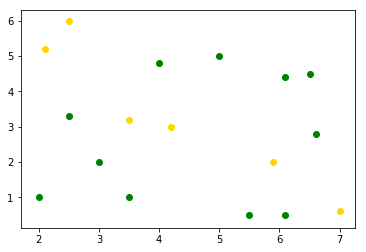

In [75]:
a_x, a_y = non_linear_a.T
plt.scatter(a_x, a_y, c = 'gold')

b_x, b_y = non_linear_b.T
plt.scatter(b_x, b_y, c = 'green')

# Neural Network

* Artificial neural networks attempt to create artificial intelligence by emulating (simplified) biological concepts.
* A Fruit fly has ~100.000 neurons
* Modest complexity compared to contempary computers.
* Still it's able to perform demanding tasks like evading obstacles, detect food, etc. 
* Computing-wise these are very demanding tasks.


# Dove Brain

<img src="img/dove_neurons.png" alt="ordinary vs parallel" style="margin: auto; width: 400px;"/>

# Model of a Neuron

* Neuron receives input in the dendrites as a certain current flow.
* When a (fuzzy) threshhold is crossed the neuron "fires" current itsself along an axon.
* Terminals are themselves connected to dendrites of other neurons.
* Axons can be imagined to have a certain diameter (_weight_), influencing its impact on other neurons.

<img src="img/model_of_neuron.png" alt="model of neuron" style="margin: auto; width: 400px;"/>

# Computational Representation

* A NN's data consists of weights and neuron layer configurations.
* On the input layer vectorized data input is fed (like sensorical stimuli)
* Accordingly on the output layer there is output data in the same form.

<img src="img/nn_sketch.png" alt="nn sketch" style="margin: auto; width: 400px;"/>

# Activation Function

* Neurons fire after a certain thresshold (_activation function_).
* Instead of using a rigid on/off step function, we can mimik fuzzyness in natural neutrons.
* Sigmoid is such a function.

$
\begin{align}
y = \frac{1}{1 + e^{-x}}
\end{align}
$

In [ ]:
import matplotlib.pyplot as plt
import scipy.special

sigmoid = scipy.special.expit

x = numpy.linspace(-5, 5)

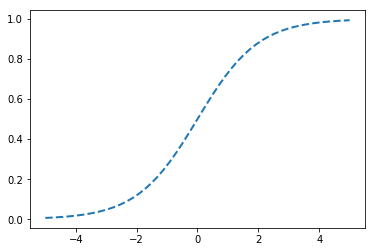

In [92]:
plt.plot(x, sigmoid(x), '--', linewidth=2)

# Calculation

* Input layer does not use an activation function, it's representing the inputs.

<img src="img/nn_calculation.png" alt="nn calculation" style="margin: auto; width: 400px;"/>

In [95]:
i_1   = 1.0
i_2   = 0.4
w_1_1 = 0.4
w_1_2 = 0.1
w_2_1 = 0.3
w_2_2 = 0.7

o_1 = sigmoid(i_1 * w_1_1 + i_2 * w_2_1)
o_2 = sigmoid(i_1 * w_1_2 + i_2 * w_2_2)
o_1, o_2

(0.6271477663131956, 0.5938731029341427)

# Digression: Matrix multiplication

* Raw sequential computing power has been stagnant. Physical limitations are to blame.
* Scaling has to happen _horizontally_ (e.g. multi-core CPUs, clusters), atomic units operate in parallel.
* Algorithms have to be crafted around those circumstances.

<img src="img/ordinary_vs_parallel.png" alt="ordinary vs parallel" style="margin: auto; width: 400px;"/>

## Imperative interdependent code

In [84]:
x = 0
l = []
for i in range(0, 10):
    x = 2 * x + 1
    l = l + [x]

l

[1, 3, 7, 15, 31, 63, 127, 255, 511, 1023]

## Declaritive data-independent code

In [85]:
[2 * i + 1 for i in range(0, 10)]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Graphical Processing Units (GPU)

* Specialized hardware to aid the CPU in vector calculations (moving polygons around).
* In use and refined for decades.
* Chips have very few instructions, but do them very well and fast.
* Incidentally on those operations GPUs is matrix multiplication.

<img src="img/virtua-fighter.png" alt="virtua fighter" style="margin: auto; width: 400px;"/>

In [86]:
import numpy

a = numpy.asarray([[1, 2],
                   [3, 4],
                  ]) 

b = numpy.asarray([[5, 6],
                   [7, 8],
                  ]) 

a.dot(b)

array([[19, 22],
       [43, 50]])

# Output Layer calculation

_Output_ is the dot product of _Weights_ and _Input_:

$
\begin{align}
\mathbf{X} = \mathbf{W \cdot I}
\end{align}
$

## Example

$
\begin{align}
W = 
\left[{\begin{array}{cc}
0,4 & 0,3 \\
0,1 & 0,7 \\
\end{array} }\right]
\end{align}
$

$
\begin{align}
I = 
\left[{\begin{array}{c}
1,0 \\
0,4 \\
\end{array} }\right]
\end{align}
$

In [93]:
W = numpy.asarray([[0.4, 0.3],
                   [0.1, 0.7],
                  ]) 
I = numpy.asarray([[1.0],
                   [0.4],
                  ])

X = W.dot(I)
X

array([[0.52],
       [0.38]])

In [ ]:
# equivalent to:
# I = numpy.array([0.9, 0.5], ndmin=2).T

The activation function needs to be applied on the intermediate values in _X_ to produce an _output_ matrix:

$
\begin{align}
\mathbf{O} = sigmoid(\mathbf{X})
\end{align}
$

In [94]:
O = sigmoid(X)
O

array([[0.62714777],
       [0.5938731 ]])

# Deep Learning

* Improvement upon Neural Networks.
* Hidden layers add some intermediate interpretation (abstraction?) to a NN, which helps at classifying.
* Introduction of a _hidden_ layer.
* Hidden layer propagates its output as input to the output layer (or another hidden layer).

<img src="img/hidden_layer.png" alt="hidden_layer" style="margin: auto; width: 600px;"/>

# Error Backpropagation

* We can find out the delta of desired and actual outputs.
* As weights have an impact on the output, the error is split proportionally.
* The error is passed back to the former layers, where it can be used to tweak the weights.

## Example

<img src="img/error_split.png" alt="split errors" style="margin: auto; width: 300px;"/>

## Calculation

* Again this can be expressed as simple and performant matrix multiplication.
* Error of the hidden layer is the dot product of the transposed Matrix of weights between the hidden and the output layer.

$
\begin{align}
\mathbf{E_h} = \mathbf{W_{ho}^T \cdot E_o}
\end{align}
$

# Updating the weigths

* Problem: Computing-wise it's not feasible to tweak the weights of even smaller deeply layered nets.
* Trying out a single set of combinations for a net with 500 neurons per layer will take decades.

# Stochastic Gradient Descent

* Accepting this restriction, methods like SGD are used to iteratively minimize errors in complex equations. 
* Idea: Model the error function as an derivable function:

$
\begin{align}
\mathbf{e} = (\mathbf{t - o})^2
\end{align}
$

* Goal is to get to the very bottom (e = 0).
* Perform "steps" in one direction on the function, asses whether the error fn at this point is ascending or descending at this position (using analysis) and move accordingly.
* Step size is _learning rate_.

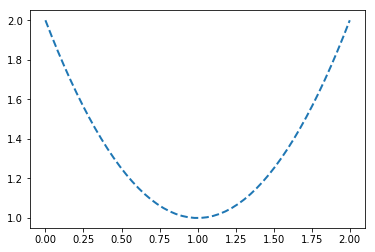

In [130]:
def some_quadratic_fn(x):
    return pow(x - 1, 2) + 1

x = numpy.linspace(0, 2)
y = some_quadratic_fn(x)
plt.plot(x, y, '--', linewidth=2)

# Dark Mountain Methapor

* A wanderer is lost at nights in the mountain.
* Wants to go the valley.
* Has a flashlight and can move the light cone around to find a descent.

<img src="img/dark_mountain.png" alt="dark mountain" style="margin: auto; width: 600px;"/>

# Weight update function

* The output depends on a multitude of connections and is wrapped in a sigmoid function.
* The deravative expression is hence more complex (j, k indicating layers):

\begin{equation*}
\frac{\partial E}{\partial w_{jk}} = -(t_k - o_k) \cdot sigmoid(\sum_j w_{jk} \cdot o_j)(1 - sigmoid(\sum_{j} w_{jk} \cdot o_j)) \cdot o_j
\end{equation*}

* Translation into matrix multiplication yields the following expression, which can be used in learning:

\begin{equation*}
\Delta W_{jk} = \alpha \cdot E_k \cdot O_k(1 - O_k) \cdot O_j^T
\end{equation*}

In [4]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

# scale function to make sure we have a range from 0.01 to 0.99
# sigmoid goes from > 0 to < 1
scale = lambda i: (numpy.asfarray(i) / 255.0 * 0.99) + 0.01

# Thanks!

...


# Neural Network Implementation

In [98]:
class NeuralNetwork:
    def __init__(self, n_inputnodes, n_hiddennodes, n_outputnodes, learning_rate):
        self.learning_rate = learning_rate
      
        self.wih = self._init_rnd_weights(n_inputnodes, n_hiddennodes)
        self.who = self._init_rnd_weights(n_hiddennodes, n_outputnodes)

        self.activation_function = scipy.special.expit
        self.inverse_activation_function = scipy.special.logit
        
    def _init_rnd_weights(self, n_layer_1, n_layer_2):
        weights = numpy.random.normal(0.0, pow(n_layer_1, -0.5), (n_layer_2, n_layer_1)) 
        
        return weights
        
    def _calc_layer(self, weights, inputs):
        weighted_inputs = numpy.dot(weights, inputs)
        outputs = self.activation_function(weighted_inputs)
        
        return outputs

    def _backprop(self, errors, outputs, inputs):
        error_delta = self.learning_rate * numpy.dot(
            (errors * outputs * (1.0 - outputs)), 
            inputs.T)
        
        return error_delta
        
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
      
        hidden_outputs = self._calc_layer(self.wih, inputs)
        final_outputs = self._calc_layer(self.who, hidden_outputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self._backprop(output_errors, final_outputs, hidden_outputs)
        self.wih += self._backprop(hidden_errors, hidden_outputs, inputs)
        
        pass
   
    def query(self, inputs_list):
        # convert input into 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
       
        hidden_outputs = self._calc_layer(self.wih, inputs)
        final_outputs = self._calc_layer(self.who, hidden_outputs)
        
        return final_outputs
  
    # scale values to sth between 0.01 and 0.99
    def _scale_values(self, values):
        # to 0
        values -= numpy.min(values)
        # to 1
        values /= numpy.max(values)
        # bump it up to 0.01 - 0.99
        values *= 0.98
        values += 0.01
        
        pass

    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        self._scale_values(hidden_outputs)
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        self._scale_values(inputs)
        
        return inputs

# Initialize NN

Using a specified number of input, hidden and output nodes and a learning_rate.

In [99]:
no_of_output_nodes = 10
no_of_input_nodes = 28 * 28
no_of_hidden_nodes = 200
learning_rate = 0.1
mnist_nn = NeuralNetwork(no_of_input_nodes, no_of_hidden_nodes, no_of_output_nodes, learning_rate)

# Helper functions

In [100]:
def get_scaled_inputs(record):
    fields = record.split(',')
    pixels = fields[1:]
    return (numpy.asfarray(pixels) / 255.0) * 0.99 + 0.01

def train(network, epochs, records):
    for e in range(epochs): 
        for record in records:
            label = get_label(record)
            inputs = get_scaled_inputs(record)
            targets = numpy.zeros(no_of_output_nodes) + 0.01
            targets[int(label)] = 0.99
            network.train(inputs, targets)
    pass

def get_label(record):
    fields = record.split(',')
    return fields[0]

def render_record(record):
    fields = record.split(',')
    label, pixels = fields[0], fields[1:]
    image_array = numpy.asfarray(pixels).reshape((28, 28))
    plt.imshow(image_array, cmap='Greys', interpolation='None')
    pass

def is_match(network, record):
    label = get_label(record)
    target_number = int(label)
    inputs = get_scaled_inputs(record) 
    outputs = network.query(inputs)
    result = numpy.argmax(outputs)
    return 1 if result == target_number else 0

def get_scores(network, records):
    return [is_match(network, record) for record in records]

# MNIST

## Small data set

### Load

In [102]:
small_training_data_file = open("mnist_train_100.csv", 'r')
#small_training_data_file = open("zalando/mnist_train_100.csv", 'r')
small_training_records = small_training_data_file.readlines()
small_training_data_file.close()

small_test_data_file = open("mnist_test_10.csv", 'r')
#small_test_data_file = open("zalando/mnist_test_10.csv", 'r')
small_test_records = small_test_data_file.readlines()
small_test_data_file.close()

### Render train sample

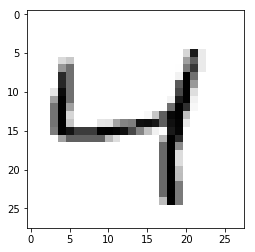

In [71]:
sample_training_record = small_training_records[2]
render_record(sample_training_record)

### Train

In [105]:
train(network=mnist_nn, epochs=5, records=small_training_records)

### Render test sample

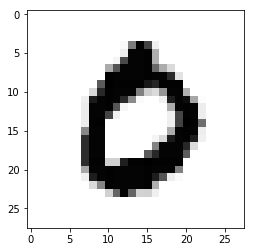

In [73]:
sample_test_record = small_test_records[3]
render_record(sample_test_record)

### Scores

In [80]:
inputs = get_scaled_inputs(sample_test_record)
label = get_label(sample_test_record)
outputs = nn.query(inputs)
output_value = numpy.argmax(outputs)
certainty = outputs[output_value][0]
print "test value {} is {} with {:f} certainty".format(label, output_value, certainty)

test value 0 is 0 with 0.771757 certainty


In [108]:
scores = get_scores(mnist_nn, small_test_records)
"all-over accuracy = {}".format(float(numpy.asarray(scores).sum()) / len(scores))

'all-over accuracy = 0.7'

## Full data set

### Load

In [109]:
full_training_data_file = open("mnist_train.csv", 'r')
#full_training_data_file = open("zalando/mnist_train.csv", 'r')
full_training_records = full_training_data_file.readlines()
full_training_data_file.close()

full_test_data_file = open("mnist_test.csv", 'r')
#full_test_data_file = open("zalando/mnist_test.csv", 'r')
full_test_records = full_test_data_file.readlines()
full_test_data_file.close()

### Train

In [110]:
train(network=mnist_nn, epochs=5, records=full_training_records)

### Scores

In [113]:
scores = get_scores(mnist_nn, full_test_records)
"all-over accuracy = {}".format(float(numpy.asarray(scores).sum()) / len(scores))

'all-over accuracy = 0.9733'

# Try with different learning rate/epoch parameters

In [195]:
learning_rate = 0.2
no_of_hidden_nodes = 200
nn2 = NeuralNetwork(no_of_input_nodes, no_of_hidden_nodes, no_of_output_nodes, learning_rate)

train(network=nn2, epochs=10, data_list=small_training_data_lines)

scores = get_scores(nn2, full_test_records)
"accuracy = {:f}".format(float(numpy.asarray(scores).sum()) / len(scores))

'accuracy = 0.500000'

# Backquery test

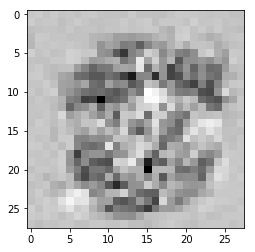

In [132]:
# label to test
label = 8
# create the output signals for this label
targets = numpy.zeros(no_of_output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99

# get image data
image_data = mnist_nn.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')